In [52]:
import  matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import scipy.io as scio
from scipy.fftpack import fft,ifft

data_path='./data/Training/'
label_path='./data/REFERENCE-v3-training.csv'
label=pd.read_csv(label_path,names = ["filename", "class"])
print(label.head)

<bound method NDFrame.head of      filename class
0      A00001     N
1      A00002     N
2      A00003     N
3      A00004     A
4      A00005     A
...       ...   ...
8523   A08524     N
8524   A08525     O
8525   A08526     N
8526   A08527     N
8527   A08528     N

[8528 rows x 2 columns]>


In [27]:
raw=[]
for filename in label['filename'].values:
    gt=label[label['filename']==filename]['class'].values[0]
    filepath=data_path+filename
    data=scio.loadmat(filepath)
    data=np.array(data['val'],dtype='int16')
    raw.append({'data':data,'class':gt})

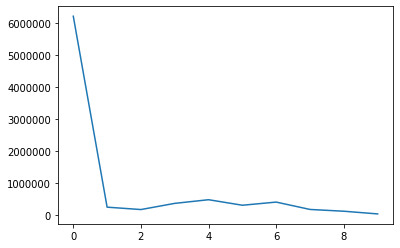

In [45]:
def energy(data):
    e=0
    for i in data:
        e+=i*i
    return e        
def power(data):
    e=0
    psd=[]
    f=fft(data)
    f1=f[range(int(len(f)/2))]
    #print(f1)
    for i in f1:
        e+=(abs(i)*abs(i))
        psd.append(abs(i)*abs(i)/len(f1))
    #print(psd)
    return e,psd
filepath='./data/Validation/A00001.mat'
data=scio.loadmat(filepath)
data=np.array(data['val'],dtype='int16')
e,psd=power(data[0])
plt.plot(range(10),psd[0:10])

In [56]:
AF,Normal,Noisy,Other=0,0,0,0
APAF,APNormal,APNoisy,APOther=0,0,0,0
from tqdm import tqdm
for filename in tqdm(label['filename'].values):
    gt=label[label['filename']==filename]['class'].values[0]
    filepath=data_path+filename
    data=scio.loadmat(filepath)
    data=np.array(data['val'],dtype='int16')[0]
    if gt=='A': 
        AF+=1
        APAF+=energy(data)/len(data)
    elif gt=='N':
        Normal+=1
        APNormal+=energy(data)/len(data)
    elif gt=='O':
        Other+=1
        APOther+=energy(data)/len(data)
    elif gt=='~':
        APNoisy+=energy(data)/len(data)
        Noisy+=1
    raw.append({'data':data,'class':gt})
print(APAF/AF,APNormal/Normal,APNoisy/Noisy,APOther/Other)

100%|██████████| 8528/8528 [01:24<00:00, 100.86it/s]3544.8839670798857 3643.9483097988445 3031.3340248233167 3527.8397174255147

